In [28]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from pathlib import Path
from sklearn.metrics import confusion_matrix
from skimage.io import imread

import os
import cv2
import numpy as np
import pandas as pd
import skimage
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
print(os.listdir("./input"))

print(os.listdir("./input/train"))

print(os.listdir("./input/train/"))

['test', 'train', '.DS_Store', 'val']
['.DS_Store', 'PNEUMONIA', 'NORMAL']
['.DS_Store', 'PNEUMONIA', 'NORMAL']


NORMAL


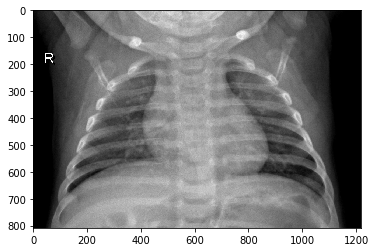

In [30]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('./input/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


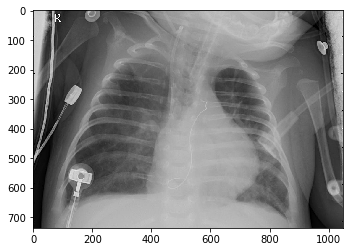

In [31]:
img_name = 'person63_bacteria_306.jpeg'
img_pneumonia = load_img('./input/train/PNEUMONIA/' + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

In [32]:
img_pneumonia.size

(1048, 736)

In [543]:
# dimensions of our images.
img_width, img_height = 150, 150

In [555]:
lp_filter=np.zeros((img_width,img_height))
diameter=int(1/8*img_width)

for a in range(img_width):
    for b in range(img_height):
        if (a-img_width/2)**2+(b-img_height/2)**2<=(diameter/2)**2:
            lp_filter[a,b]=1

In [556]:
train_data_dir = './input/train/'
validation_data_dir = './input/val/'
test_data_dir = './input/test/'

nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [557]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (img_width, img_height, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    img=img[:,:,0]
#                     img = np.real(np.fft.fft2(img))
                    img = np.fft.ifft2(np.fft.ifftshift(np.multiply(np.fft.fftshift(np.fft.fft2(img/255)),lp_filter)))
                    img=np.abs(img)*10**4
                    all_data=np.concatenate((img[:,:,np.newaxis], img[:,:,np.newaxis],img[:,:,np.newaxis]), axis=2)
                    X.append(all_data)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [496]:
X_train, y_train = get_data(train_data_dir)



  0%|          | 0/3876 [00:00<?, ?it/s]

  0%|          | 3/3876 [00:00<02:23, 27.08it/s]

  0%|          | 6/3876 [00:00<02:21, 27.27it/s]

  0%|          | 9/3876 [00:00<02:31, 25.50it/s]

  0%|          | 12/3876 [00:00<02:27, 26.26it/s]

  0%|          | 15/3876 [00:00<02:35, 24.81it/s]

  0%|          | 18/3876 [00:00<02:32, 25.28it/s]

  1%|          | 22/3876 [00:00<02:19, 27.56it/s]

  1%|          | 25/3876 [00:00<02:22, 27.08it/s]

  1%|          | 30/3876 [00:01<02:16, 28.21it/s]

  1%|          | 33/3876 [00:01<02:18, 27.71it/s]

  1%|          | 37/3876 [00:01<02:10, 29.46it/s]

  1%|          | 42/3876 [00:01<01:59, 32.08it/s]

  1%|          | 46/3876 [00:01<02:10, 29.44it/s]

  1%|▏         | 50/3876 [00:01<02:01, 31.42it/s]

  1%|▏         | 54/3876 [00:01<02:01, 31.39it/s]

  1%|▏         | 58/3876 [00:02<02:16, 27.88it/s]

  2%|▏         | 61/3876 [00:02<02:18, 27.63it/s]

  2%|▏         | 65/3876 [00:02<02:18, 27.54it/s]

  2%|▏         | 68/3876 [00:02<02:34, 24

 14%|█▎        | 524/3876 [00:19<02:37, 21.26it/s]

 14%|█▎        | 527/3876 [00:19<02:27, 22.76it/s]

 14%|█▎        | 530/3876 [00:19<02:26, 22.77it/s]

 14%|█▍        | 533/3876 [00:19<02:16, 24.50it/s]

 14%|█▍        | 536/3876 [00:19<02:13, 25.07it/s]

 14%|█▍        | 539/3876 [00:19<02:13, 25.04it/s]

 14%|█▍        | 543/3876 [00:19<02:00, 27.76it/s]

 14%|█▍        | 546/3876 [00:19<02:07, 26.10it/s]

 14%|█▍        | 550/3876 [00:20<01:57, 28.31it/s]

 14%|█▍        | 553/3876 [00:20<02:17, 24.14it/s]

 14%|█▍        | 557/3876 [00:20<02:05, 26.47it/s]

 14%|█▍        | 561/3876 [00:20<02:15, 24.38it/s]

 15%|█▍        | 566/3876 [00:20<02:05, 26.43it/s]

 15%|█▍        | 569/3876 [00:20<02:12, 25.01it/s]

 15%|█▍        | 572/3876 [00:20<02:05, 26.23it/s]

 15%|█▍        | 575/3876 [00:21<02:05, 26.26it/s]

 15%|█▍        | 579/3876 [00:21<01:59, 27.61it/s]

 15%|█▌        | 582/3876 [00:21<02:02, 26.97it/s]

 15%|█▌        | 586/3876 [00:21<01:52, 29.18it/s]

 15%|█▌     

 27%|██▋       | 1056/3876 [00:37<01:19, 35.30it/s]

 27%|██▋       | 1060/3876 [00:38<01:33, 30.19it/s]

 27%|██▋       | 1064/3876 [00:38<01:27, 32.16it/s]

 28%|██▊       | 1068/3876 [00:38<01:28, 31.81it/s]

 28%|██▊       | 1072/3876 [00:38<01:30, 31.03it/s]

 28%|██▊       | 1076/3876 [00:38<01:25, 32.81it/s]

 28%|██▊       | 1080/3876 [00:38<01:24, 33.20it/s]

 28%|██▊       | 1084/3876 [00:38<01:28, 31.46it/s]

 28%|██▊       | 1089/3876 [00:39<01:20, 34.52it/s]

 28%|██▊       | 1093/3876 [00:39<01:22, 33.72it/s]

 28%|██▊       | 1097/3876 [00:39<01:25, 32.36it/s]

 28%|██▊       | 1101/3876 [00:39<01:44, 26.60it/s]

 29%|██▊       | 1105/3876 [00:39<01:34, 29.44it/s]

 29%|██▊       | 1109/3876 [00:39<01:42, 26.91it/s]

 29%|██▊       | 1113/3876 [00:39<01:38, 28.14it/s]

 29%|██▉       | 1117/3876 [00:40<01:32, 29.72it/s]

 29%|██▉       | 1121/3876 [00:40<01:45, 26.09it/s]

 29%|██▉       | 1124/3876 [00:40<02:00, 22.80it/s]

 29%|██▉       | 1128/3876 [00:40<01:48, 25.34

 41%|████      | 1583/3876 [00:56<01:20, 28.47it/s]

 41%|████      | 1586/3876 [00:56<01:20, 28.43it/s]

 41%|████      | 1589/3876 [00:56<01:19, 28.83it/s]

 41%|████      | 1592/3876 [00:56<01:24, 27.16it/s]

 41%|████      | 1596/3876 [00:57<01:21, 28.12it/s]

 41%|████▏     | 1600/3876 [00:57<01:20, 28.13it/s]

 41%|████▏     | 1603/3876 [00:57<01:37, 23.30it/s]

 41%|████▏     | 1606/3876 [00:57<01:31, 24.78it/s]

 42%|████▏     | 1610/3876 [00:57<01:24, 26.91it/s]

 42%|████▏     | 1614/3876 [00:57<01:21, 27.78it/s]

 42%|████▏     | 1618/3876 [00:57<01:24, 26.64it/s]

 42%|████▏     | 1622/3876 [00:58<01:18, 28.90it/s]

 42%|████▏     | 1626/3876 [00:58<01:11, 31.28it/s]

 42%|████▏     | 1630/3876 [00:58<01:07, 33.44it/s]

 42%|████▏     | 1634/3876 [00:58<01:05, 34.04it/s]

 42%|████▏     | 1638/3876 [00:58<01:06, 33.50it/s]

 42%|████▏     | 1642/3876 [00:58<01:08, 32.42it/s]

 42%|████▏     | 1646/3876 [00:58<01:19, 28.02it/s]

 43%|████▎     | 1650/3876 [00:58<01:15, 29.63

 55%|█████▍    | 2126/3876 [01:14<00:51, 33.70it/s]

 55%|█████▍    | 2131/3876 [01:14<00:51, 33.89it/s]

 55%|█████▌    | 2135/3876 [01:14<00:53, 32.47it/s]

 55%|█████▌    | 2139/3876 [01:15<01:01, 28.41it/s]

 55%|█████▌    | 2144/3876 [01:15<00:55, 31.06it/s]

 55%|█████▌    | 2149/3876 [01:15<00:52, 32.67it/s]

 56%|█████▌    | 2154/3876 [01:15<00:49, 34.89it/s]

 56%|█████▌    | 2158/3876 [01:15<00:49, 34.96it/s]

 56%|█████▌    | 2162/3876 [01:15<00:47, 35.86it/s]

 56%|█████▌    | 2166/3876 [01:15<00:49, 34.53it/s]

 56%|█████▌    | 2171/3876 [01:15<00:45, 37.39it/s]

 56%|█████▌    | 2176/3876 [01:16<00:46, 36.41it/s]

 56%|█████▌    | 2180/3876 [01:16<00:51, 32.91it/s]

 56%|█████▋    | 2184/3876 [01:16<00:54, 30.85it/s]

 56%|█████▋    | 2188/3876 [01:16<00:59, 28.40it/s]

 57%|█████▋    | 2191/3876 [01:16<00:59, 28.38it/s]

 57%|█████▋    | 2195/3876 [01:16<00:56, 29.84it/s]

 57%|█████▋    | 2199/3876 [01:16<00:57, 29.31it/s]

 57%|█████▋    | 2202/3876 [01:17<00:57, 29.22

 70%|██████▉   | 2700/3876 [01:32<00:41, 28.67it/s]

 70%|██████▉   | 2705/3876 [01:33<00:36, 32.21it/s]

 70%|██████▉   | 2709/3876 [01:33<00:37, 31.06it/s]

 70%|██████▉   | 2713/3876 [01:33<00:35, 32.48it/s]

 70%|███████   | 2717/3876 [01:33<00:35, 32.73it/s]

 70%|███████   | 2721/3876 [01:33<00:34, 33.62it/s]

 70%|███████   | 2725/3876 [01:33<00:34, 33.18it/s]

 70%|███████   | 2729/3876 [01:33<00:32, 34.95it/s]

 71%|███████   | 2733/3876 [01:33<00:35, 32.49it/s]

 71%|███████   | 2737/3876 [01:34<00:34, 33.49it/s]

 71%|███████   | 2742/3876 [01:34<00:30, 36.60it/s]

 71%|███████   | 2746/3876 [01:34<00:31, 35.88it/s]

 71%|███████   | 2752/3876 [01:34<00:29, 38.11it/s]

 71%|███████   | 2757/3876 [01:34<00:27, 40.92it/s]

 71%|███████▏  | 2762/3876 [01:34<00:36, 30.78it/s]

 71%|███████▏  | 2766/3876 [01:34<00:35, 31.33it/s]

 71%|███████▏  | 2770/3876 [01:35<00:37, 29.24it/s]

 72%|███████▏  | 2776/3876 [01:35<00:32, 33.85it/s]

 72%|███████▏  | 2780/3876 [01:35<00:34, 31.70

 85%|████████▍ | 3289/3876 [01:51<00:17, 32.72it/s]

 85%|████████▍ | 3293/3876 [01:51<00:17, 32.41it/s]

 85%|████████▌ | 3297/3876 [01:51<00:19, 29.10it/s]

 85%|████████▌ | 3302/3876 [01:51<00:17, 32.50it/s]

 85%|████████▌ | 3306/3876 [01:52<00:19, 29.12it/s]

 85%|████████▌ | 3310/3876 [01:52<00:18, 30.90it/s]

 86%|████████▌ | 3314/3876 [01:52<00:17, 31.64it/s]

 86%|████████▌ | 3319/3876 [01:52<00:15, 34.82it/s]

 86%|████████▌ | 3323/3876 [01:52<00:16, 33.65it/s]

 86%|████████▌ | 3327/3876 [01:52<00:16, 33.60it/s]

 86%|████████▌ | 3331/3876 [01:52<00:16, 33.09it/s]

 86%|████████▌ | 3335/3876 [01:52<00:16, 32.14it/s]

 86%|████████▌ | 3339/3876 [01:53<00:15, 33.96it/s]

 86%|████████▋ | 3346/3876 [01:53<00:13, 39.67it/s]

 86%|████████▋ | 3351/3876 [01:53<00:13, 39.79it/s]

 87%|████████▋ | 3356/3876 [01:53<00:14, 36.61it/s]

 87%|████████▋ | 3362/3876 [01:53<00:12, 40.14it/s]

 87%|████████▋ | 3367/3876 [01:53<00:13, 37.69it/s]

 87%|████████▋ | 3372/3876 [01:53<00:12, 38.91

100%|█████████▉| 3866/3876 [02:10<00:00, 33.16it/s]

100%|█████████▉| 3870/3876 [02:10<00:00, 33.03it/s]

100%|█████████▉| 3874/3876 [02:10<00:00, 31.62it/s]

100%|██████████| 3876/3876 [02:10<00:00, 29.70it/s]

  0%|          | 0/1342 [00:00<?, ?it/s]

  0%|          | 2/1342 [00:00<01:30, 14.84it/s]

  0%|          | 4/1342 [00:00<01:32, 14.39it/s]

  0%|          | 6/1342 [00:00<01:33, 14.34it/s]

  1%|          | 8/1342 [00:00<01:35, 14.04it/s]

  1%|          | 10/1342 [00:00<01:42, 13.04it/s]

  1%|          | 12/1342 [00:00<01:32, 14.43it/s]

  1%|          | 14/1342 [00:01<01:33, 14.23it/s]

  1%|          | 16/1342 [00:01<01:35, 13.83it/s]

  1%|▏         | 18/1342 [00:01<01:41, 13.09it/s]

  1%|▏         | 20/1342 [00:01<01:35, 13.82it/s]

  2%|▏         | 22/1342 [00:01<01:44, 12.62it/s]

  2%|▏         | 24/1342 [00:01<01:39, 13.27it/s]

  2%|▏         | 26/1342 [00:01<01:39, 13.21it/s]

  2%|▏         | 28/1342 [00:02<01:39, 13.27it/s]

  2%|▏         | 30/1342 [00:02<01:4

 21%|██        | 280/1342 [00:21<01:16, 13.91it/s]

 21%|██        | 282/1342 [00:21<01:15, 14.08it/s]

 21%|██        | 284/1342 [00:21<01:25, 12.42it/s]

 21%|██▏       | 286/1342 [00:21<01:24, 12.44it/s]

 21%|██▏       | 288/1342 [00:21<01:23, 12.63it/s]

 22%|██▏       | 290/1342 [00:21<01:18, 13.37it/s]

 22%|██▏       | 292/1342 [00:22<01:19, 13.19it/s]

 22%|██▏       | 294/1342 [00:22<01:16, 13.79it/s]

 22%|██▏       | 296/1342 [00:22<01:16, 13.69it/s]

 22%|██▏       | 298/1342 [00:22<01:22, 12.66it/s]

 22%|██▏       | 300/1342 [00:22<01:31, 11.36it/s]

 23%|██▎       | 302/1342 [00:22<01:23, 12.49it/s]

 23%|██▎       | 304/1342 [00:23<01:15, 13.77it/s]

 23%|██▎       | 306/1342 [00:23<01:14, 13.91it/s]

 23%|██▎       | 309/1342 [00:23<01:04, 15.91it/s]

 23%|██▎       | 311/1342 [00:23<01:02, 16.38it/s]

 23%|██▎       | 313/1342 [00:23<01:02, 16.35it/s]

 23%|██▎       | 315/1342 [00:23<01:03, 16.14it/s]

 24%|██▎       | 317/1342 [00:23<01:02, 16.42it/s]

 24%|██▍    

 43%|████▎     | 573/1342 [00:43<00:47, 16.13it/s]

 43%|████▎     | 575/1342 [00:43<00:50, 15.12it/s]

 43%|████▎     | 577/1342 [00:44<01:04, 11.84it/s]

 43%|████▎     | 579/1342 [00:44<00:59, 12.86it/s]

 43%|████▎     | 581/1342 [00:44<01:00, 12.64it/s]

 43%|████▎     | 583/1342 [00:44<00:53, 14.09it/s]

 44%|████▎     | 585/1342 [00:44<00:51, 14.59it/s]

 44%|████▍     | 588/1342 [00:44<00:50, 14.97it/s]

 44%|████▍     | 590/1342 [00:45<00:58, 12.89it/s]

 44%|████▍     | 592/1342 [00:45<00:53, 13.90it/s]

 44%|████▍     | 594/1342 [00:45<00:56, 13.17it/s]

 44%|████▍     | 596/1342 [00:45<01:02, 12.02it/s]

 45%|████▍     | 598/1342 [00:45<01:09, 10.66it/s]

 45%|████▍     | 600/1342 [00:45<01:10, 10.58it/s]

 45%|████▍     | 602/1342 [00:46<01:01, 12.01it/s]

 45%|████▌     | 604/1342 [00:46<00:56, 13.12it/s]

 45%|████▌     | 606/1342 [00:46<00:57, 12.90it/s]

 45%|████▌     | 608/1342 [00:46<00:53, 13.64it/s]

 45%|████▌     | 610/1342 [00:46<00:53, 13.62it/s]

 46%|████▌  

 64%|██████▍   | 864/1342 [01:06<00:41, 11.45it/s]

 65%|██████▍   | 866/1342 [01:06<00:41, 11.57it/s]

 65%|██████▍   | 868/1342 [01:06<00:37, 12.55it/s]

 65%|██████▍   | 870/1342 [01:06<00:36, 12.88it/s]

 65%|██████▍   | 872/1342 [01:06<00:37, 12.41it/s]

 65%|██████▌   | 874/1342 [01:06<00:35, 13.17it/s]

 65%|██████▌   | 876/1342 [01:07<00:44, 10.47it/s]

 65%|██████▌   | 878/1342 [01:07<00:41, 11.21it/s]

 66%|██████▌   | 880/1342 [01:07<00:36, 12.57it/s]

 66%|██████▌   | 882/1342 [01:07<00:33, 13.74it/s]

 66%|██████▌   | 884/1342 [01:07<00:35, 12.82it/s]

 66%|██████▌   | 886/1342 [01:07<00:35, 12.94it/s]

 66%|██████▌   | 888/1342 [01:07<00:34, 13.27it/s]

 66%|██████▋   | 890/1342 [01:08<00:33, 13.66it/s]

 66%|██████▋   | 892/1342 [01:08<00:30, 14.82it/s]

 67%|██████▋   | 894/1342 [01:08<00:29, 15.44it/s]

 67%|██████▋   | 896/1342 [01:08<00:32, 13.66it/s]

 67%|██████▋   | 898/1342 [01:08<00:36, 12.15it/s]

 67%|██████▋   | 900/1342 [01:08<00:33, 13.24it/s]

 67%|██████▋

 86%|████████▌ | 1152/1342 [01:27<00:16, 11.50it/s]

 86%|████████▌ | 1155/1342 [01:27<00:14, 13.08it/s]

 86%|████████▌ | 1157/1342 [01:27<00:15, 11.64it/s]

 86%|████████▋ | 1159/1342 [01:28<00:14, 12.21it/s]

 87%|████████▋ | 1161/1342 [01:28<00:13, 13.50it/s]

 87%|████████▋ | 1163/1342 [01:28<00:13, 13.07it/s]

 87%|████████▋ | 1165/1342 [01:28<00:12, 14.46it/s]

 87%|████████▋ | 1167/1342 [01:28<00:12, 14.49it/s]

 87%|████████▋ | 1169/1342 [01:28<00:11, 15.66it/s]

 87%|████████▋ | 1171/1342 [01:28<00:12, 13.96it/s]

 87%|████████▋ | 1173/1342 [01:28<00:11, 14.22it/s]

 88%|████████▊ | 1175/1342 [01:29<00:13, 12.77it/s]

 88%|████████▊ | 1177/1342 [01:29<00:11, 13.90it/s]

 88%|████████▊ | 1180/1342 [01:29<00:10, 15.18it/s]

 88%|████████▊ | 1182/1342 [01:29<00:10, 15.49it/s]

 88%|████████▊ | 1184/1342 [01:29<00:10, 15.12it/s]

 88%|████████▊ | 1187/1342 [01:29<00:09, 16.39it/s]

 89%|████████▊ | 1189/1342 [01:29<00:09, 16.37it/s]

 89%|████████▊ | 1191/1342 [01:30<00:09, 15.25

In [497]:
X_test , y_test = get_data(test_data_dir)



  0%|          | 0/390 [00:00<?, ?it/s]

  1%|          | 4/390 [00:00<00:09, 39.66it/s]

  2%|▏         | 8/390 [00:00<00:09, 38.29it/s]

  3%|▎         | 13/390 [00:00<00:10, 36.61it/s]

  4%|▍         | 16/390 [00:00<00:11, 32.20it/s]

  5%|▌         | 20/390 [00:00<00:10, 34.05it/s]

  6%|▌         | 24/390 [00:00<00:10, 33.53it/s]

  7%|▋         | 28/390 [00:00<00:11, 32.73it/s]

  8%|▊         | 32/390 [00:00<00:11, 31.25it/s]

  9%|▉         | 35/390 [00:01<00:11, 29.76it/s]

 10%|▉         | 38/390 [00:01<00:11, 29.72it/s]

 11%|█         | 41/390 [00:01<00:13, 26.60it/s]

 12%|█▏        | 46/390 [00:01<00:11, 29.35it/s]

 13%|█▎        | 50/390 [00:01<00:11, 30.30it/s]

 14%|█▍        | 54/390 [00:01<00:10, 30.94it/s]

 15%|█▍        | 58/390 [00:01<00:11, 29.56it/s]

 16%|█▌        | 63/390 [00:02<00:10, 29.78it/s]

 17%|█▋        | 67/390 [00:02<00:10, 30.48it/s]

 18%|█▊        | 71/390 [00:02<00:10, 31.59it/s]

 19%|█▉        | 75/390 [00:02<00:10, 29.76it/s]

 20%|██  

 46%|████▌     | 108/234 [00:08<00:09, 13.34it/s]

 47%|████▋     | 110/234 [00:08<00:08, 13.97it/s]

 48%|████▊     | 112/234 [00:08<00:10, 11.87it/s]

 49%|████▊     | 114/234 [00:08<00:09, 12.39it/s]

 50%|████▉     | 116/234 [00:08<00:09, 12.71it/s]

 50%|█████     | 118/234 [00:09<00:10, 10.89it/s]

 51%|█████▏    | 120/234 [00:09<00:10, 11.13it/s]

 52%|█████▏    | 122/234 [00:09<00:10, 10.40it/s]

 53%|█████▎    | 124/234 [00:09<00:12,  9.15it/s]

 54%|█████▍    | 126/234 [00:09<00:10, 10.00it/s]

 55%|█████▍    | 128/234 [00:10<00:09, 11.21it/s]

 56%|█████▌    | 130/234 [00:10<00:08, 12.60it/s]

 56%|█████▋    | 132/234 [00:10<00:08, 12.10it/s]

 57%|█████▋    | 134/234 [00:10<00:09, 10.22it/s]

 58%|█████▊    | 136/234 [00:10<00:08, 11.52it/s]

 59%|█████▉    | 138/234 [00:10<00:08, 11.81it/s]

 60%|██████    | 141/234 [00:11<00:06, 13.57it/s]

 61%|██████    | 143/234 [00:11<00:06, 13.74it/s]

 62%|██████▏   | 146/234 [00:11<00:05, 14.87it/s]

 63%|██████▎   | 148/234 [00:11

In [558]:
X_val, y_val=get_data(validation_data_dir)



  0%|          | 0/9 [00:00<?, ?it/s]

 44%|████▍     | 4/9 [00:00<00:00, 38.38it/s]

 78%|███████▊  | 7/9 [00:00<00:00, 30.48it/s]

100%|██████████| 9/9 [00:00<00:00, 27.50it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

 22%|██▏       | 2/9 [00:00<00:00, 15.44it/s]

 56%|█████▌    | 5/9 [00:00<00:00, 16.79it/s]

 78%|███████▊  | 7/9 [00:00<00:00, 16.17it/s]

100%|██████████| 9/9 [00:00<00:00, 15.75it/s]



In [559]:
X_val[0]

array([[[2.03443525, 2.03443525, 2.03443525],
        [2.28742096, 2.28742096, 2.28742096],
        [2.8902584 , 2.8902584 , 2.8902584 ],
        ...,
        [3.14272304, 3.14272304, 3.14272304],
        [2.4958943 , 2.4958943 , 2.4958943 ],
        [2.11380313, 2.11380313, 2.11380313]],

       [[2.3058272 , 2.3058272 , 2.3058272 ],
        [2.39321733, 2.39321733, 2.39321733],
        [2.8488958 , 2.8488958 , 2.8488958 ],
        ...,
        [3.99622308, 3.99622308, 3.99622308],
        [3.14561285, 3.14561285, 3.14561285],
        [2.56767228, 2.56767228, 2.56767228]],

       [[2.56226536, 2.56226536, 2.56226536],
        [2.49343735, 2.49343735, 2.49343735],
        [2.8098092 , 2.8098092 , 2.8098092 ],
        ...,
        [4.80142576, 4.80142576, 4.80142576],
        [3.75857127, 3.75857127, 3.75857127],
        [2.9960502 , 2.9960502 , 2.9960502 ]],

       ...,

       [[1.24007222, 1.24007222, 1.24007222],
        [1.98752344, 1.98752344, 1.98752344],
        [3.02471858, 3

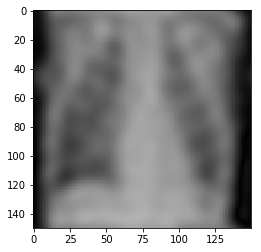

In [560]:
plt.imshow(X_val[0]/50)

In [501]:
print(X_train.shape,'\n',X_test.shape)

(5216, 50, 50, 3) 
 (624, 50, 50, 3)


In [502]:
print(y_train.shape,'\n',y_test.shape)

(5216,) 
 (624,)


In [503]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [504]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [505]:
model.layers

In [506]:
model.input

<tf.Tensor 'conv2d_43_input:0' shape=(?, 50, 50, 3) dtype=float32>

In [507]:
model.output

<tf.Tensor 'activation_75/Sigmoid:0' shape=(?, 1) dtype=float32>

In [508]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [509]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [510]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [511]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [512]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [513]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [514]:
# history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=batch_size),
#                               epochs = epochs,
#                               steps_per_epoch=nb_train_samples // batch_size,
#                               validation_data=test_datagen.flow(X_val,y_val,batch_size=batch_size),
#                               validation_steps=nb_validation_samples // batch_size)

In [515]:
history = model.fit(X_train, y_train, validation_data = (X_val , y_val),
                    epochs=epochs)

Train on 5216 samples, validate on 16 samples
Epoch 1/20
5216/5216 [==============================] - 9s 2ms/step - loss: 0.7575 - acc: 0.7299 - val_loss: 0.5490 - val_acc: 0.7500
Epoch 2/20
5216/5216 [==============================] - 7s 1ms/step - loss: 0.4371 - acc: 0.8056 - val_loss: 0.4342 - val_acc: 0.9375
Epoch 3/20
5216/5216 [==============================] - 7s 1ms/step - loss: 0.3407 - acc: 0.8476 - val_loss: 0.9499 - val_acc: 0.5625
Epoch 4/20
5216/5216 [==============================] - 7s 1ms/step - loss: 0.2929 - acc: 0.8769 - val_loss: 0.4891 - val_acc: 0.9375
Epoch 5/20
5216/5216 [==============================] - 7s 1ms/step - loss: 0.2852 - acc: 0.8806 - val_loss: 0.3991 - val_acc: 0.8750
Epoch 6/20
5216/5216 [==============================] - 7s 1ms/step - loss: 0.2752 - acc: 0.8888 - val_loss: 0.3085 - val_acc: 0.9375
Epoch 7/20
5216/5216 [==============================] - 7s 1ms/step - loss: 0.2652 - acc: 0.8928 - val_loss: 0.5680 - val_acc: 0.7500
Epoch 8/20
5216/

In [516]:
scores=model.evaluate(x=X_test,y=y_test)
scores

624/624 [==============================] - 0s 466us/step


[1.2028550281165502, 0.782051282051282]

In [517]:
preds = model.predict(x=X_test)

original_label=y_test

In [518]:
preds=np.rint(preds)
preds

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

[[119 115]
 [ 21 369]]


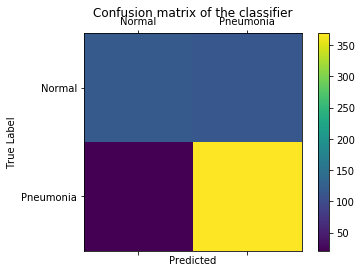

In [519]:
labels = ['Normal', 'Pneumonia']
cm  = confusion_matrix(original_label, preds)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

In [520]:
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.95
Precision of the model is 0.76


In [417]:
# diameter_image=[]
# fmodel_precision=[]
# fmodel_recall=[]

In [521]:
diameter_image.append(diameter/img_width)
fmodel_precision.append(precision)
fmodel_recall.append(recall)

In [527]:
diameter_image

In [528]:
fmodel_precision

In [529]:
fmodel_recall

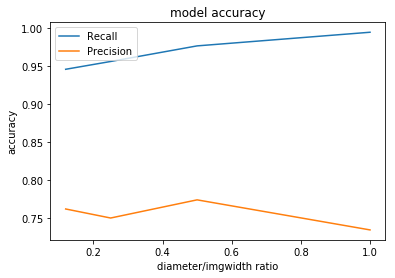

In [532]:
plt.plot(diameter_image,fmodel_recall)
plt.plot(diameter_image,fmodel_precision)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('diameter/imgwidth ratio')
plt.legend(['Recall','Precision'], loc='upper left')
plt.show()

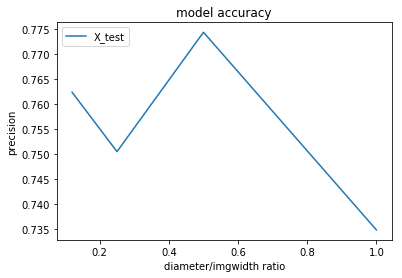

In [531]:
plt.plot(diameter_image,fmodel_precision)
plt.title('model accuracy')
plt.ylabel('precision')
plt.xlabel('diameter/imgwidth ratio')
plt.legend(['X_test'], loc='upper left')
plt.show()

In [ ]:
# imgsize.append(img_width)
# models_precision.append(precision)
# models_recall.append(recall)

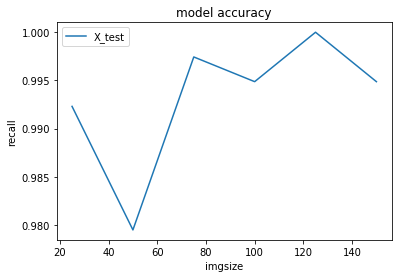

In [220]:
plt.plot(imgsize,models_recall)
plt.title('model accuracy')
plt.ylabel('recall')
plt.xlabel('imgsize')
plt.legend(['X_test'], loc='upper left')
plt.show()

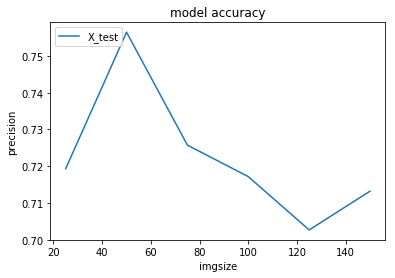

In [221]:
plt.plot(imgsize,models_precision)
plt.title('model accuracy')
plt.ylabel('precision')
plt.xlabel('imgsize')
plt.legend(['X_test'], loc='upper left')
plt.show()

In [36]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
 81/326 [======>.......................] - ETA: 1:44 - loss: 0.3752 - acc: 0.8835

KeyboardInterrupt: 

In [381]:
# model.save_weights('first_try.h5')

In [409]:
# # evaluate the model
# scores = model.evaluate_generator(test_generator,steps=2)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 96.88%


creating confustion matrix

In [410]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    shuffle=False,
    batch_size=624,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [411]:
preds = model.predict_generator(test_generator,steps=1)

# x,original_label=test_generator.next()
# preds = np.argmax(preds, axis=-1)
original_label=test_generator.classes

In [412]:
original_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [413]:
preds=np.rint(preds)
preds

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

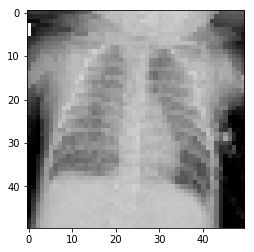

In [414]:
x,y=validation_generator.next()

plt.imshow(x[1])

confusion matrix

[[173  61]
 [ 10 380]]


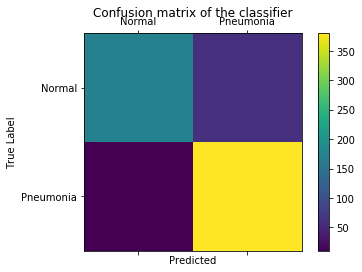

In [415]:
labels = ['Normal', 'Pneumonia']
cm  = confusion_matrix(original_label, preds)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

In [416]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.97
Precision of the model is 0.86


In [26]:
# imgsize=[]
# models_precision=[]
# models_recall=[]

In [310]:
# imgsize.append(img_width)
# models_precision.append(precision)
# models_recall.append(recall)

In [21]:
# models_precision=[0.8432671081677704,
#                   0.8710407239819005,
#  0.7983367983367984,
#  0.8130252100840336,
#  0.8417582417582418,
#  0.8773148148148148,
#  0.8370044052863436]

In [12]:
# models_recall=[0.9794871794871793,
#  0.9871794871794872,
#  0.9846153846153847,
#  0.9923076923076923,
#  0.982051282051282,
#  0.9717948717948718,
#  0.9743589743589743]

In [13]:
# imgsize=[ 224, 150, 125, 100, 75, 50, 25]

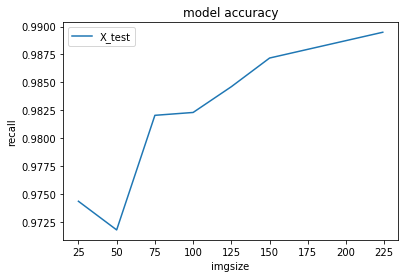

In [25]:
plt.plot(imgsize,models_recall)
plt.title('model accuracy')
plt.ylabel('recall')
plt.xlabel('imgsize')
plt.legend(['X_test'], loc='upper left')
plt.show()

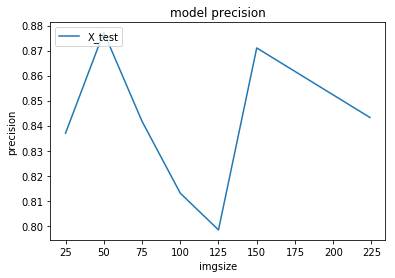

[0.9894871794871793,
 0.9871794871794872,
 0.9846153846153847,
 0.9823076923076923,
 0.982051282051282,
 0.9717948717948718,
 0.9743589743589743]